# CISC 867 Deep Learning: Project 2 LeNet and Transfer Learning
Group 3,

Names and IDs:

Ahmed AbdelKhalek
21ama31@queensu.ca

Mahmoud Basha
21mmma@queensu.ca

Asmaa Qindeel 
21aaae1@queensu.ca


# Problem:
Implemention of LeNet-5 network to recognize the Fashion-MNIST digits. 

# Table Of Contents:

1. Data Analysis:
    * [Load the data](#load)
    * [Describing the Data](#describe)
    * [Cleaning the Data](#clean)
    * [Visualize](#visualize) </br>
    * [Correlation Analysis](#correlation) </br>
    
2. [Data Preprocessing:](#pre)
    * [Draw some samples](#draw)
    * [label Encoding](#encode)
3. [Trainig LeNet-5](#lenet)
4. [Transfer Learning: ResNet-50](#resnet)
5. [Transfer Learning: VGG-16](#vgg)

# Loading the training, and test data <a class="anchor" id="load"></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [13]:
train = pd.read_csv('fashion-mnist_train.csv', header = 0)
test = pd.read_csv('fashion-mnist_test.csv', header = 0)
train

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0        30        43   
3           0  ...         3         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             1         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[60000 rows x 785 columns]

# Description of the data <a class="anchor" id="describe"></a>

The Fashion-MNIST dataset consists of traing, and test sets. The training set consists of 60,000 image, while the test consists of 10000 images. The output for both sets are labels of the images. There are 10 labels T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot. every image is grayscaled. Since each image is 28x28 pixels, the dataset represents the images as 1 row with 785 columns, 1 column for the image label, and the other 784 column are the image pixels.
every pixel(column) has a range value from 0 to 255. The value indicats the lightness or darkness of that pixel, with higher numbers meaning darker.

# Cleaning the data <a class="anchor" id="clean"></a>
Before cleaning the data, we need to know if there is any null value, or duplicated values.

In [14]:
#See how many null values in the datasets
print('The number of NULL values in the training set is ',train[train.isna()==True].any(axis = 0).sum())
print('The number of NULL values in the test set is ',test[test.isna()==True].any(axis = 0).sum()) 

The number of NULL values in the training set is  0
The number of NULL values in the test set is  0


In [15]:
#See how many values are duplicated in the datasets
print('The number of duplicated values in the training set is ',train.duplicated().sum())
print('The number of duplicated values in the test set is ',test.duplicated().sum())

The number of duplicated values in the training set is  43
The number of duplicated values in the test set is  1


In [16]:
#We will clean the data by removing the all the duplicated rows except the first instance.

train_clean = train.drop_duplicates(keep='first')
test_clean = test.drop_duplicates(keep='first')

print('The number of duplicated values after cleaning ',train_clean.duplicated().sum())
print('The number of duplicated values after cleaning ',test_clean.duplicated().sum())

The number of duplicated values after cleaning  0
The number of duplicated values after cleaning  0


# Visualization <a class="anchor" id="visualize"></a>

In [17]:
#Copying the original data is alwyas good
df = train.copy()

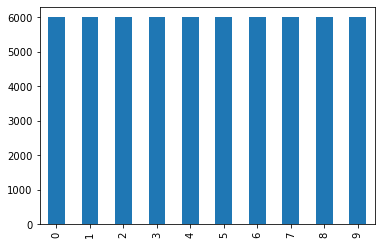

In [18]:
#Rpresnting the distribution of the labels
df_labels = df['label']
df_labels_dis = df_labels.value_counts().sort_values(ascending=False).head(10)
df_labels_dis.plot(x ='Pixel Number', y='Pixel Value', kind = 'bar')
plt.show()

The distribution of the valuses of pixel number 1 in label 0


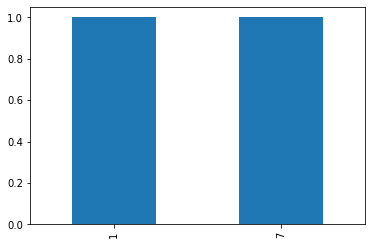

The distribution of the valuses of pixel number 2 in label 0


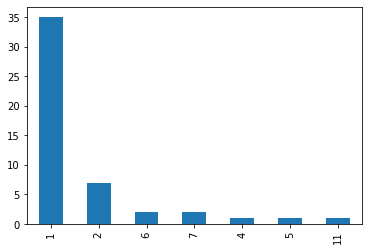

The distribution of the valuses of pixel number 3 in label 0


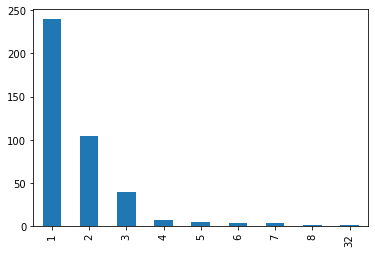

The distribution of the valuses of pixel number 4 in label 0


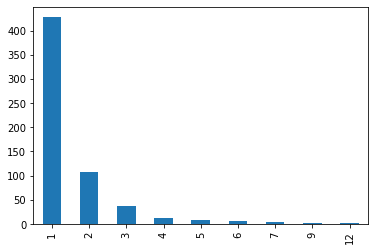

The distribution of the valuses of pixel number 5 in label 0


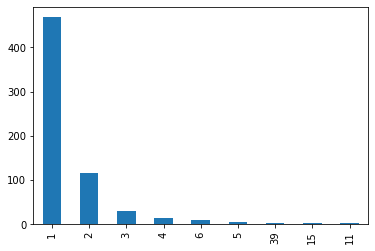

The distribution of the valuses of pixel number 6 in label 0


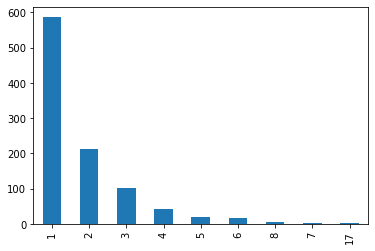

The distribution of the valuses of pixel number 7 in label 0


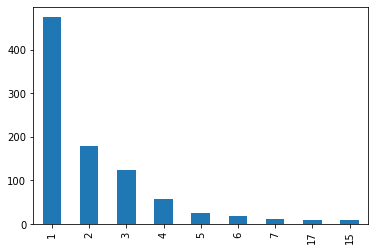

The distribution of the valuses of pixel number 8 in label 0


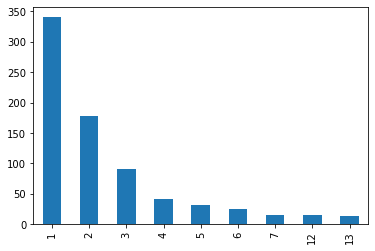

The distribution of the valuses of pixel number 9 in label 0


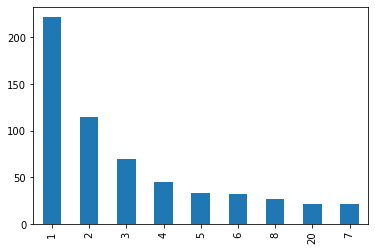

The distribution of the valuses of pixel number 10 in label 0


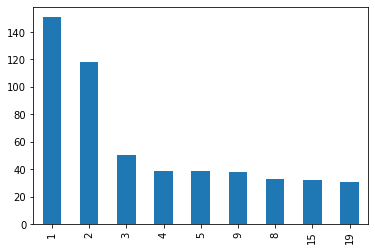

The distribution of the valuses of pixel number 1 in label 1


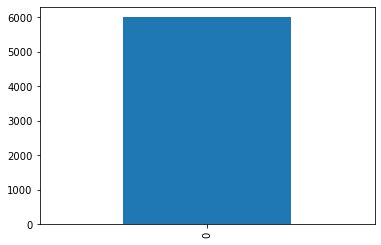

The distribution of the valuses of pixel number 2 in label 1


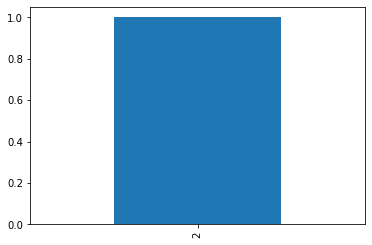

The distribution of the valuses of pixel number 3 in label 1


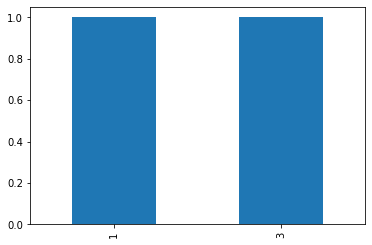

The distribution of the valuses of pixel number 4 in label 1


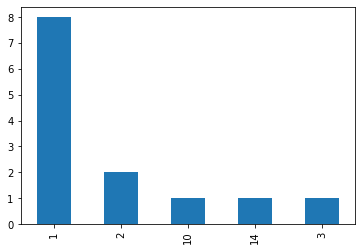

The distribution of the valuses of pixel number 5 in label 1


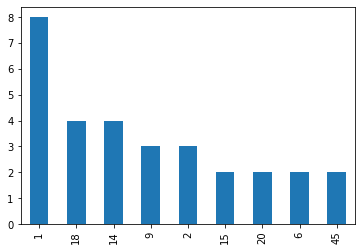

The distribution of the valuses of pixel number 6 in label 1


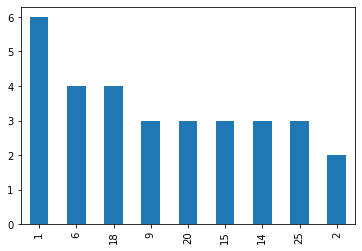

The distribution of the valuses of pixel number 7 in label 1


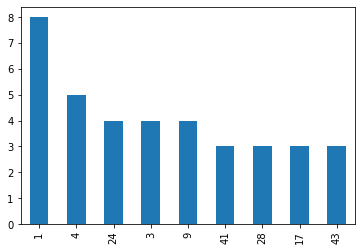

The distribution of the valuses of pixel number 8 in label 1


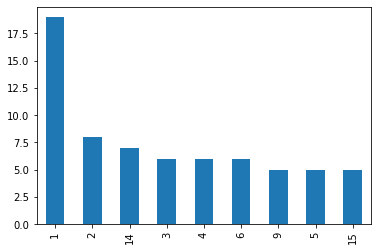

The distribution of the valuses of pixel number 9 in label 1


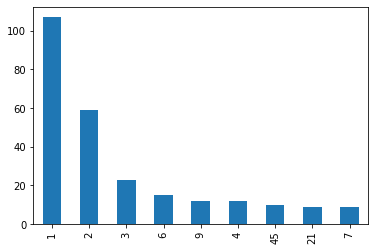

The distribution of the valuses of pixel number 10 in label 1


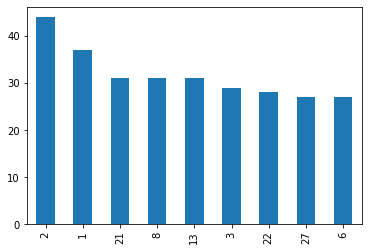

The distribution of the valuses of pixel number 1 in label 2


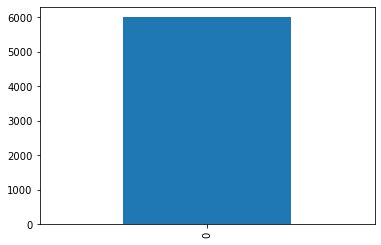

The distribution of the valuses of pixel number 2 in label 2


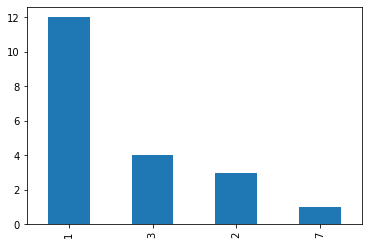

The distribution of the valuses of pixel number 3 in label 2


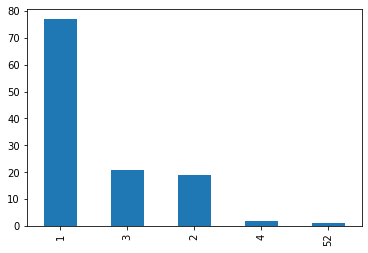

The distribution of the valuses of pixel number 4 in label 2


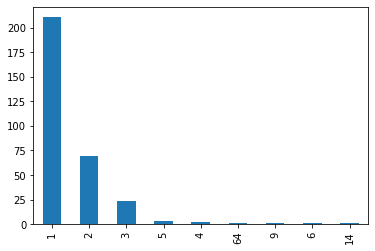

The distribution of the valuses of pixel number 5 in label 2


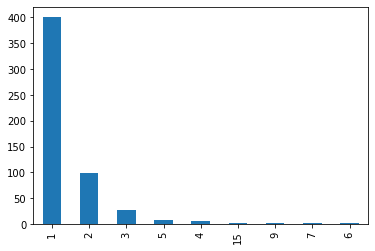

The distribution of the valuses of pixel number 6 in label 2


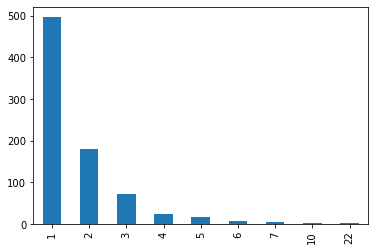

The distribution of the valuses of pixel number 7 in label 2


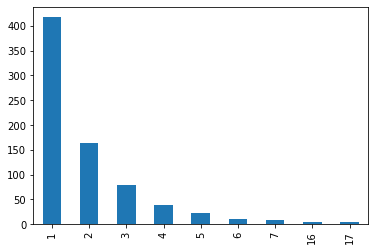

The distribution of the valuses of pixel number 8 in label 2


The distribution of the valuses of pixel number 9 in label 2


The distribution of the valuses of pixel number 10 in label 2


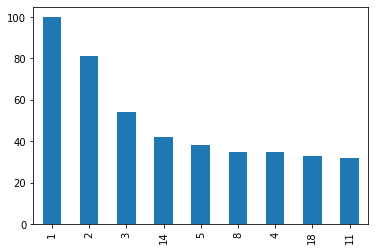

The distribution of the valuses of pixel number 1 in label 3


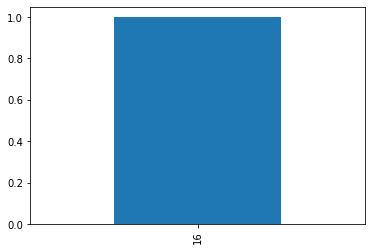

The distribution of the valuses of pixel number 2 in label 3


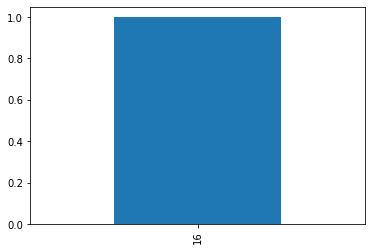

The distribution of the valuses of pixel number 3 in label 3


The distribution of the valuses of pixel number 4 in label 3


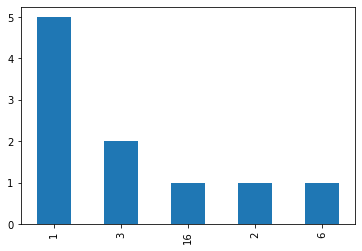

The distribution of the valuses of pixel number 5 in label 3


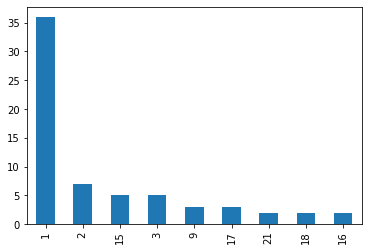

The distribution of the valuses of pixel number 6 in label 3


The distribution of the valuses of pixel number 7 in label 3


The distribution of the valuses of pixel number 8 in label 3


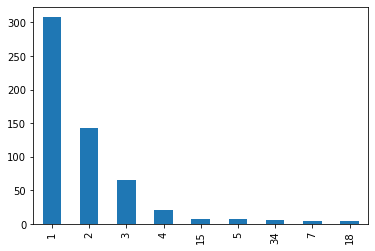

The distribution of the valuses of pixel number 9 in label 3


The distribution of the valuses of pixel number 10 in label 3


The distribution of the valuses of pixel number 1 in label 4


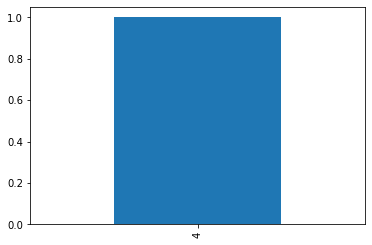

The distribution of the valuses of pixel number 2 in label 4


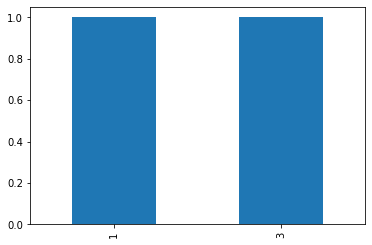

The distribution of the valuses of pixel number 3 in label 4


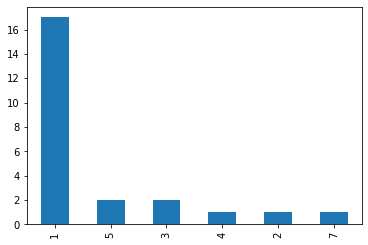

The distribution of the valuses of pixel number 4 in label 4


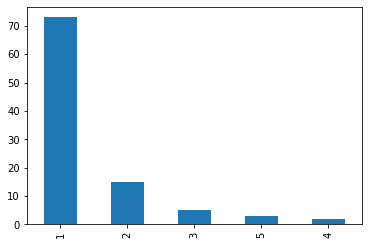

The distribution of the valuses of pixel number 5 in label 4


The distribution of the valuses of pixel number 6 in label 4


The distribution of the valuses of pixel number 7 in label 4


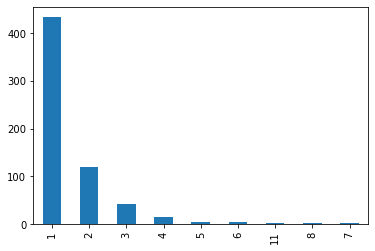

The distribution of the valuses of pixel number 8 in label 4


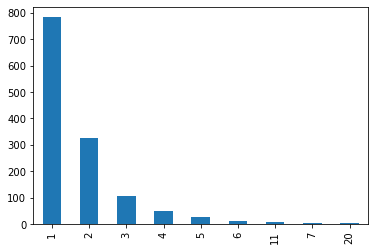

The distribution of the valuses of pixel number 9 in label 4


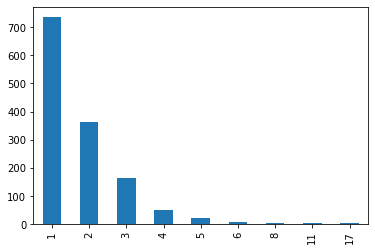

The distribution of the valuses of pixel number 10 in label 4


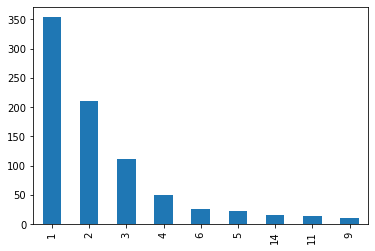

The distribution of the valuses of pixel number 1 in label 5


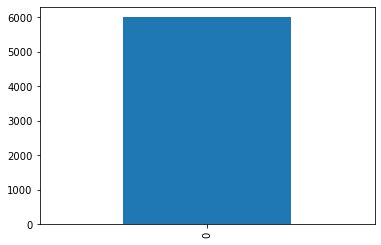

The distribution of the valuses of pixel number 2 in label 5


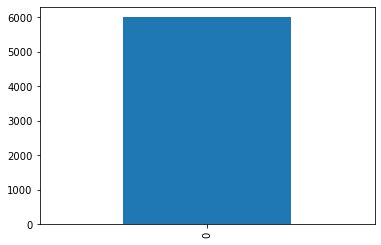

The distribution of the valuses of pixel number 3 in label 5


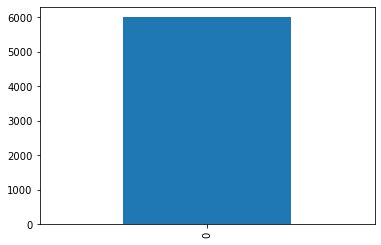

The distribution of the valuses of pixel number 4 in label 5


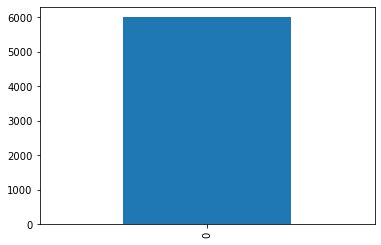

The distribution of the valuses of pixel number 5 in label 5


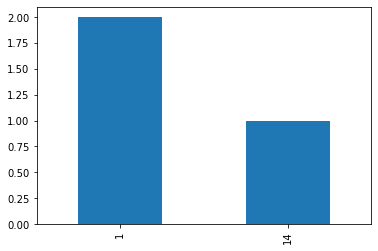

The distribution of the valuses of pixel number 6 in label 5


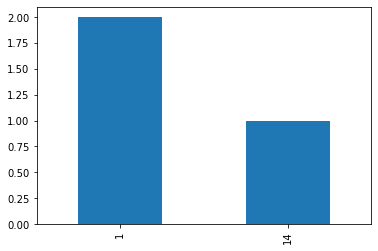

The distribution of the valuses of pixel number 7 in label 5


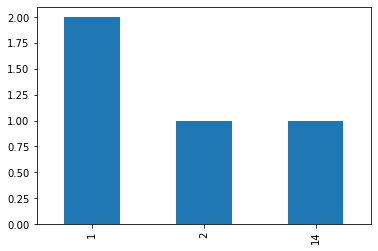

The distribution of the valuses of pixel number 8 in label 5


The distribution of the valuses of pixel number 9 in label 5


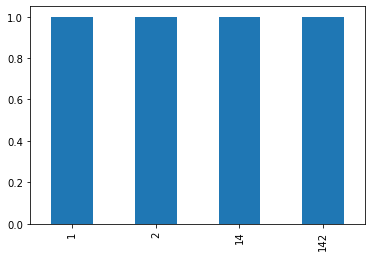

The distribution of the valuses of pixel number 10 in label 5


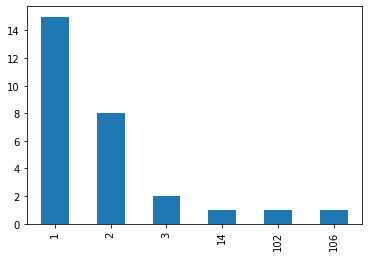

The distribution of the valuses of pixel number 1 in label 6


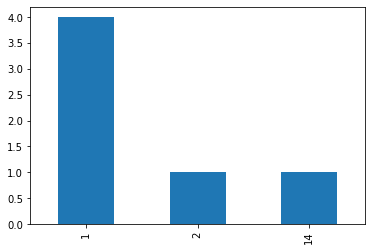

The distribution of the valuses of pixel number 2 in label 6


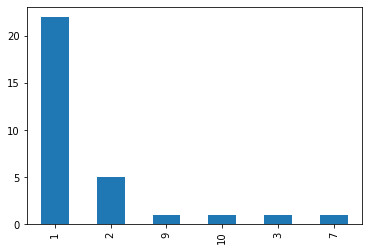

The distribution of the valuses of pixel number 3 in label 6


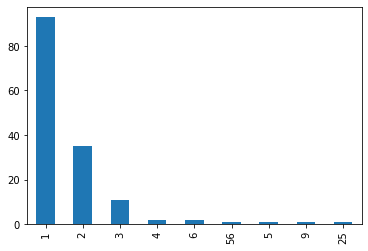

The distribution of the valuses of pixel number 4 in label 6


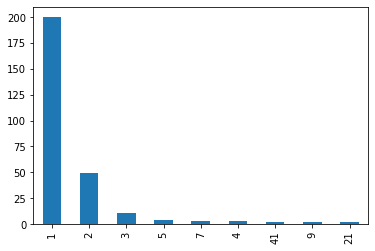

The distribution of the valuses of pixel number 5 in label 6


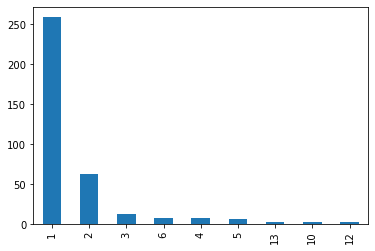

The distribution of the valuses of pixel number 6 in label 6


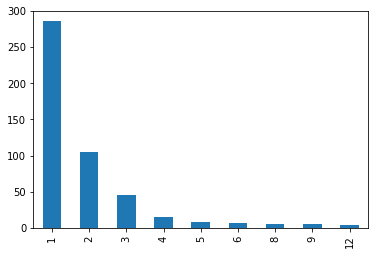

The distribution of the valuses of pixel number 7 in label 6


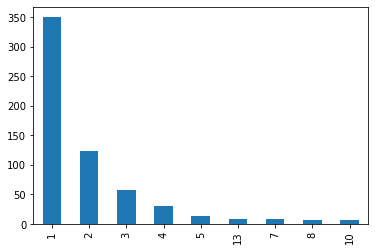

The distribution of the valuses of pixel number 8 in label 6


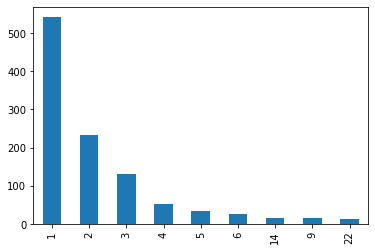

The distribution of the valuses of pixel number 9 in label 6


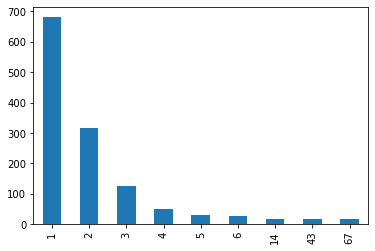

The distribution of the valuses of pixel number 10 in label 6


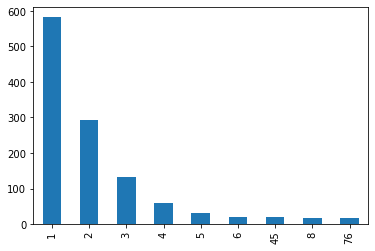

The distribution of the valuses of pixel number 1 in label 7


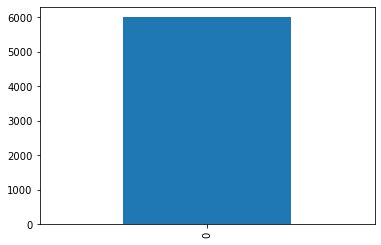

The distribution of the valuses of pixel number 2 in label 7


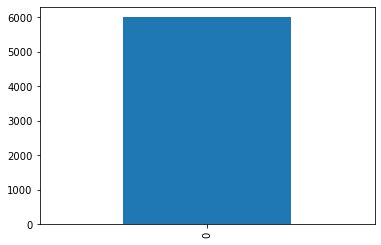

The distribution of the valuses of pixel number 3 in label 7


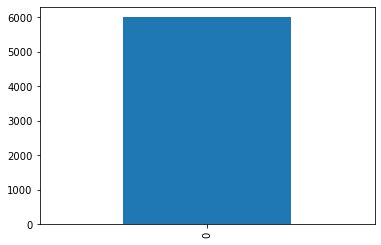

The distribution of the valuses of pixel number 4 in label 7


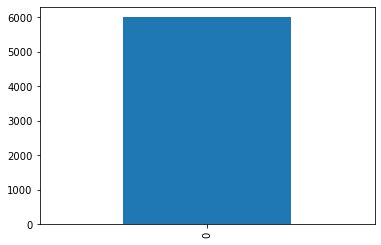

The distribution of the valuses of pixel number 5 in label 7


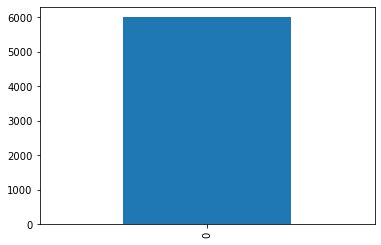

The distribution of the valuses of pixel number 6 in label 7


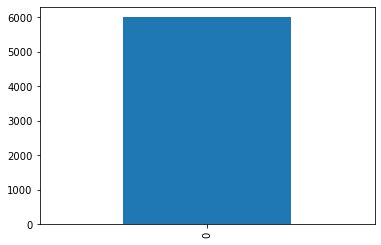

The distribution of the valuses of pixel number 7 in label 7


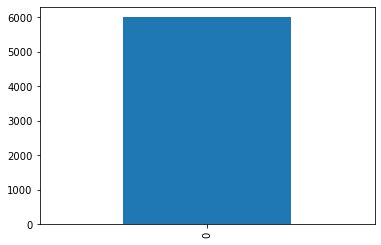

The distribution of the valuses of pixel number 8 in label 7


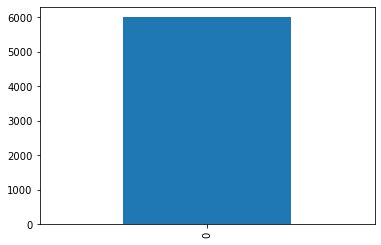

The distribution of the valuses of pixel number 9 in label 7


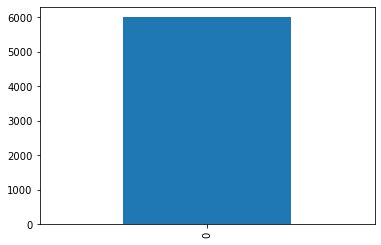

The distribution of the valuses of pixel number 10 in label 7


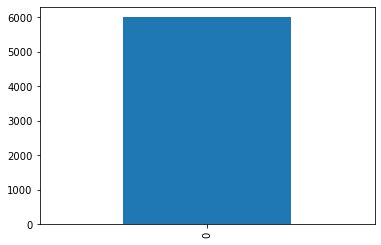

The distribution of the valuses of pixel number 1 in label 8


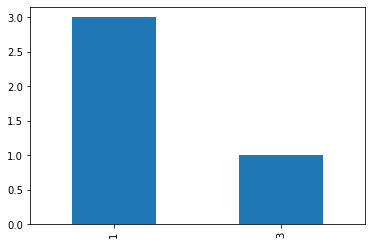

The distribution of the valuses of pixel number 2 in label 8


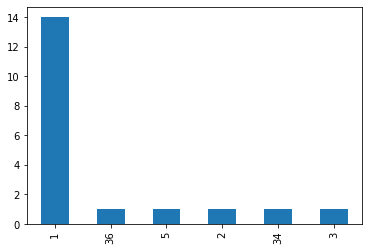

The distribution of the valuses of pixel number 3 in label 8


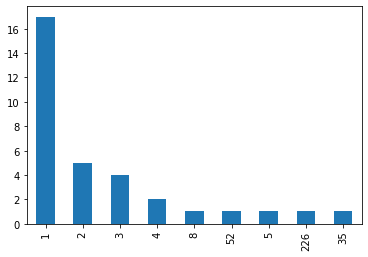

The distribution of the valuses of pixel number 4 in label 8


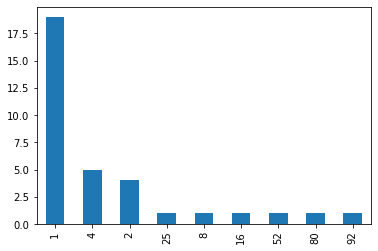

The distribution of the valuses of pixel number 5 in label 8


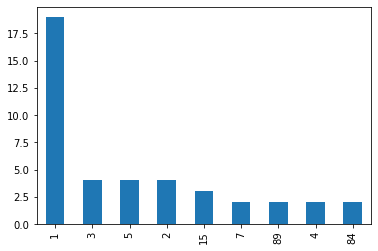

The distribution of the valuses of pixel number 6 in label 8


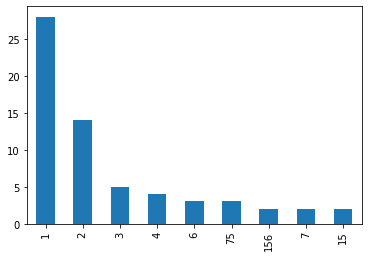

The distribution of the valuses of pixel number 7 in label 8


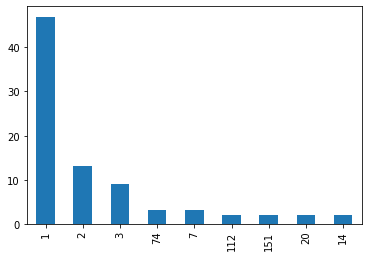

The distribution of the valuses of pixel number 8 in label 8


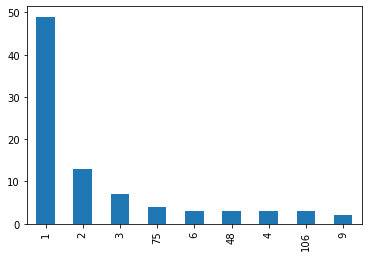

The distribution of the valuses of pixel number 9 in label 8


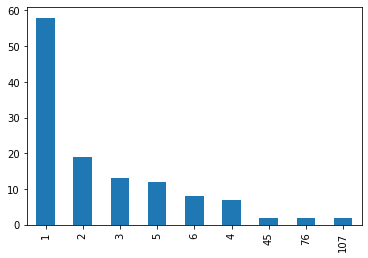

The distribution of the valuses of pixel number 10 in label 8


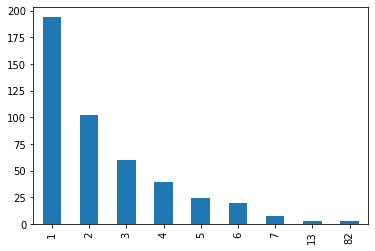

The distribution of the valuses of pixel number 1 in label 9


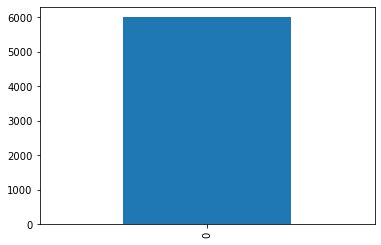

The distribution of the valuses of pixel number 2 in label 9


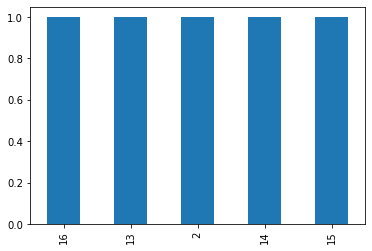

The distribution of the valuses of pixel number 3 in label 9


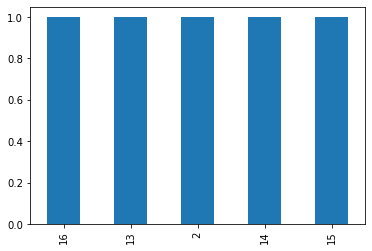

The distribution of the valuses of pixel number 4 in label 9


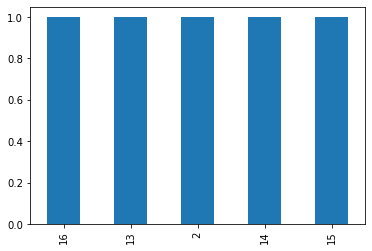

The distribution of the valuses of pixel number 5 in label 9


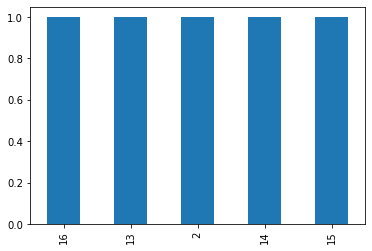

The distribution of the valuses of pixel number 6 in label 9


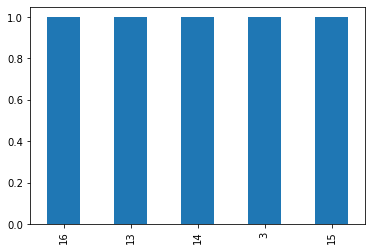

The distribution of the valuses of pixel number 7 in label 9


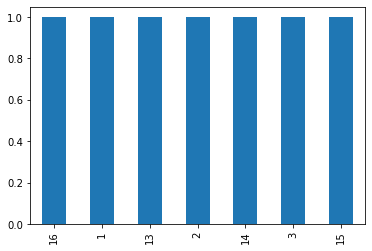

The distribution of the valuses of pixel number 8 in label 9


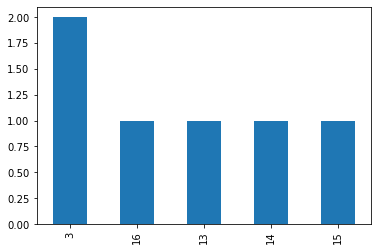

The distribution of the valuses of pixel number 9 in label 9


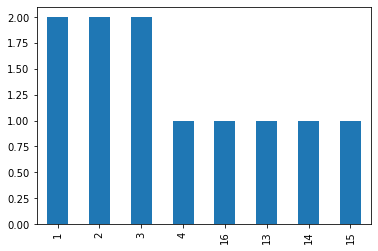

The distribution of the valuses of pixel number 10 in label 9


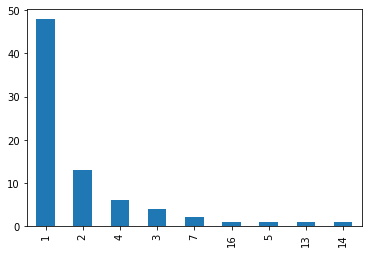

In [19]:
#Since there is 784 pixels we can't represnt every one of them but we build a method to see the most frequent pixel values in every label
#Because most the pixel values are 0, we need to exlude them, so we can see which pixel are the most relevent
for i in range(10):
    for j in range(1,11,1):
        print('The distribution of the valuses of pixel number '+str(j)+' in label '+str(i))
        df_0 = df[df['label'] == i]
        df13 = df_0.iloc[:,j]
        df13_mean = df13.value_counts().sort_values(ascending=False).head(10)
        df13_mean_dist = df13_mean[1:]
        if df13_mean_dist.empty:
            df13_mean.plot(x ='Pixel Number', y='Pixel Value', kind = 'bar')
            plt.show()
        else:
            df13_mean_dist.plot(x ='Pixel Number', y='Pixel Value', kind = 'bar')
            plt.show()

In [20]:
# Scatter and density plots of the pixels in every label
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

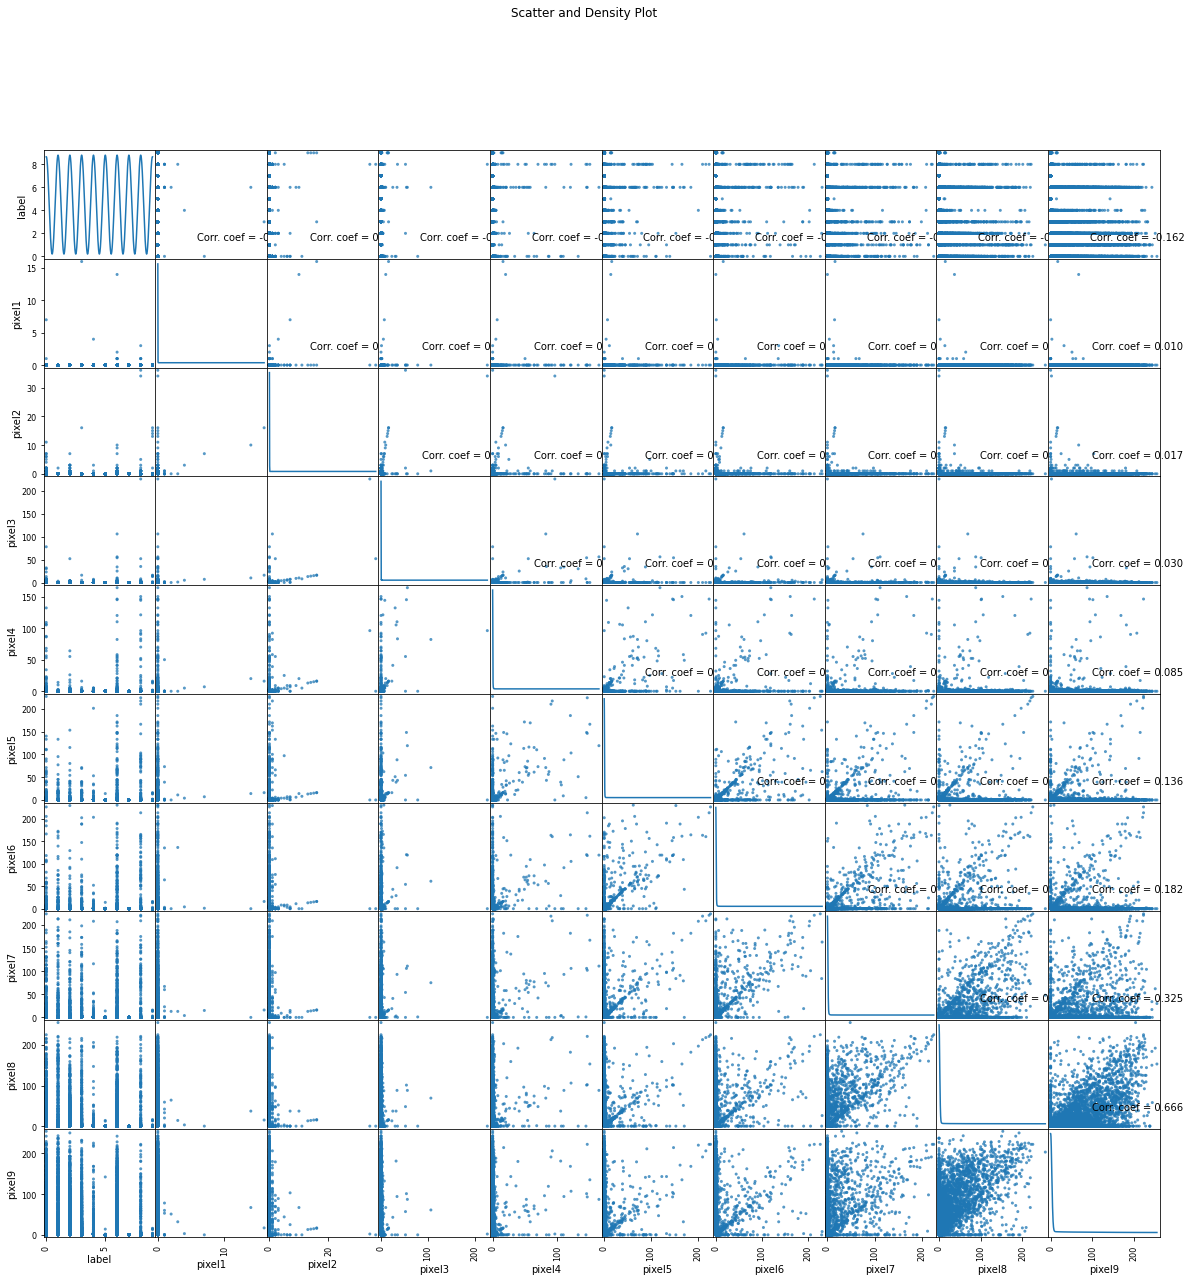

In [21]:
plotScatterMatrix(train, 20,10)

# Correlation Analysis <a class="anchor" id="correlation"></a>

In [27]:
#Correlation of every pixel
#Refrence 
def plotCorrelationMatrix(df, graphWidth):
#     filename = df.name
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

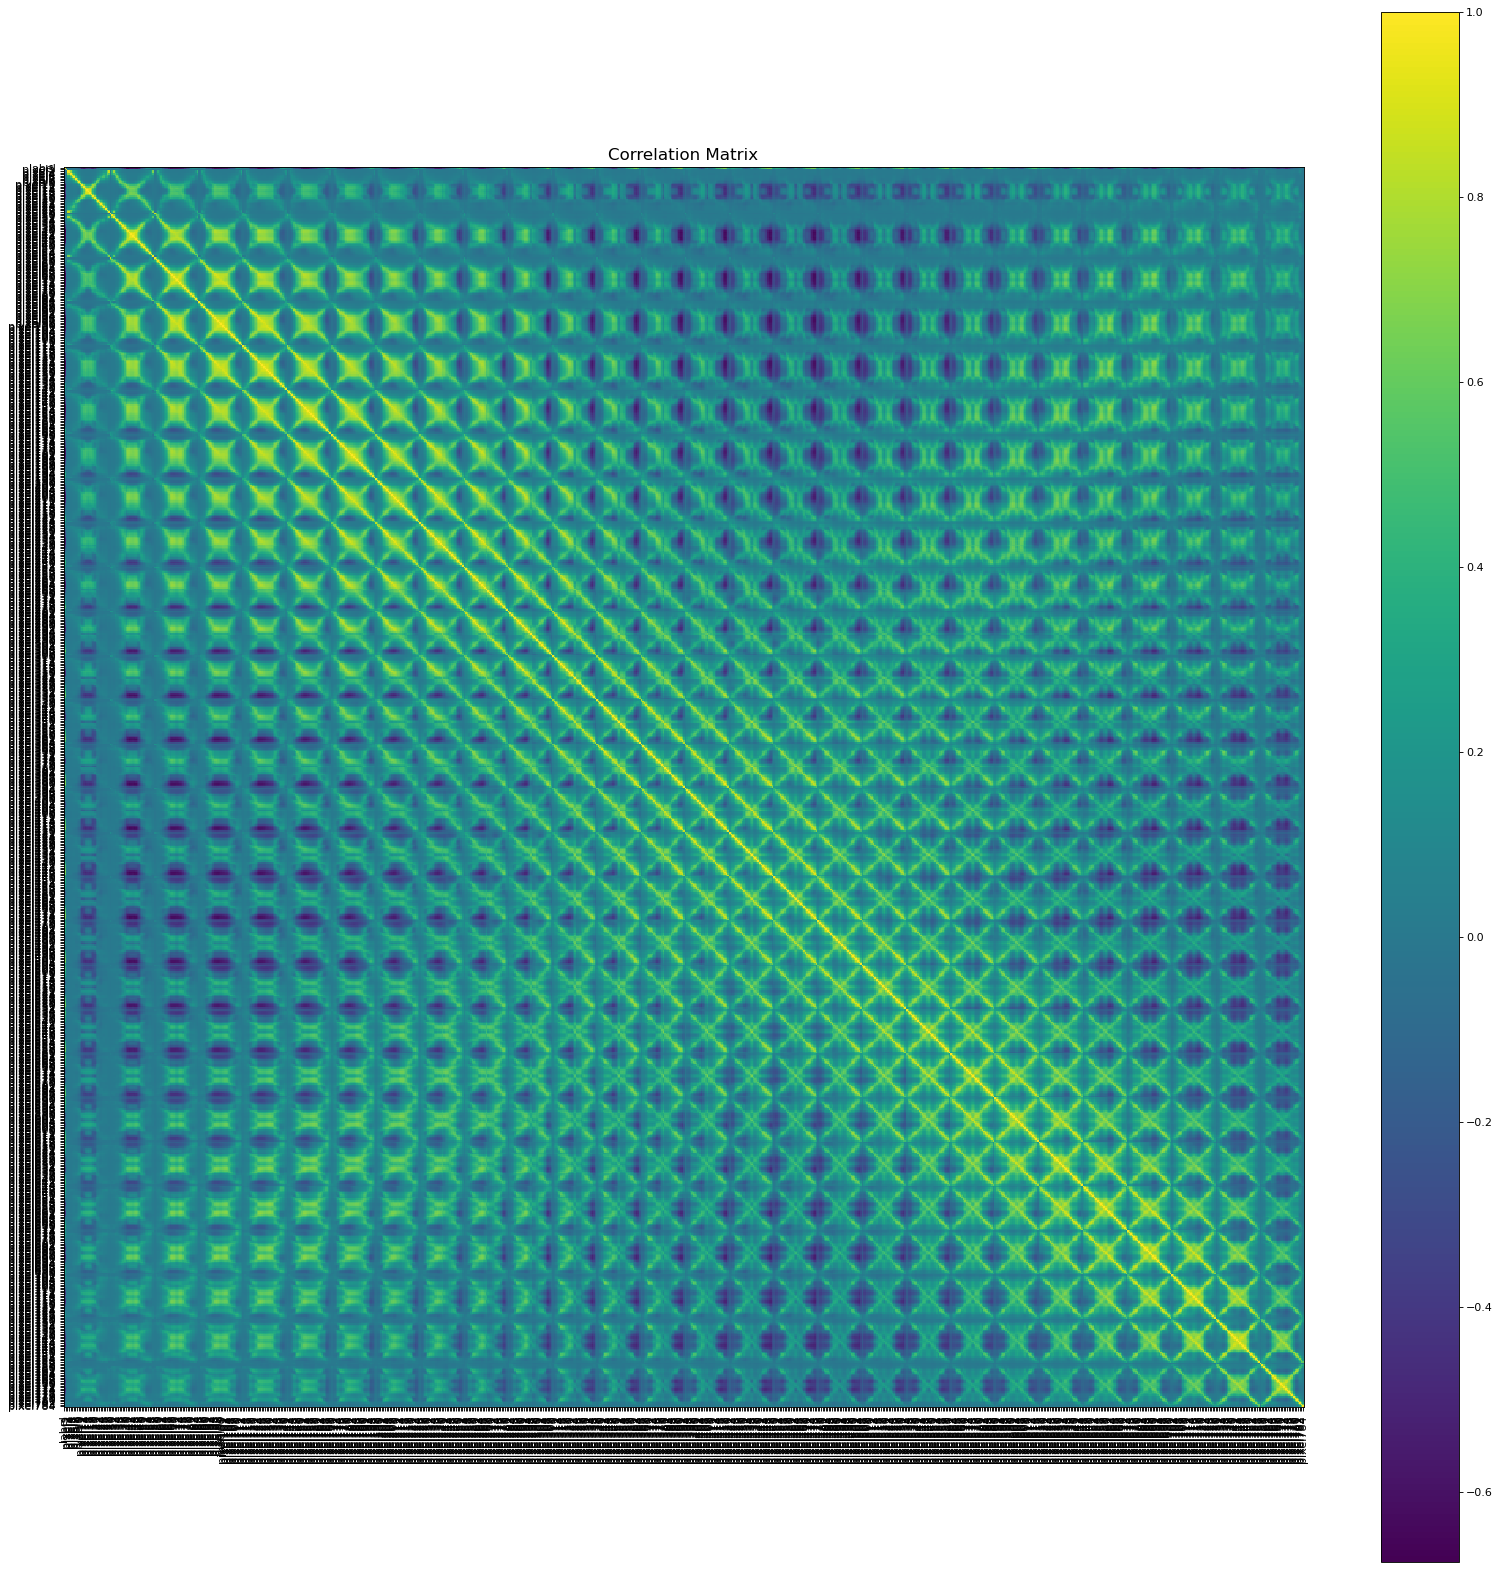

In [28]:
plotCorrelationMatrix(test, 25)

# Drawing images <a class="anchor" id="draw"></a>


In [30]:
#Splitting the training data from the labels in both the training, and test data
x_train = train.drop(['label'],axis = 1)
y_train = train['label']
x_test = test.drop(['label'],axis = 1)
y_test = test['label']

In [31]:
#Converting the dataframe to array so we can draw the images.
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [32]:
#Normalizing the data
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float64')/255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float64')/255

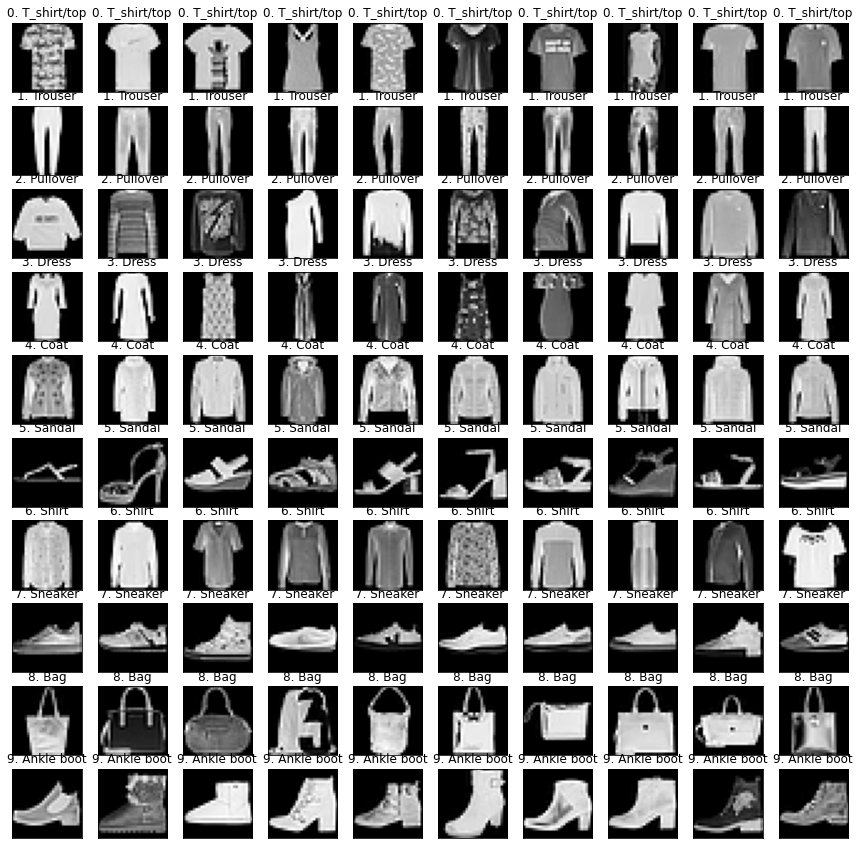

In [33]:
#Drawing some of the fashion Minsit images
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (15,15))
for k in range(10):
    xx = x_train[y_train == k]
    yy = y_train[y_train == k].reset_index()['label']
    for i in range(10):
        plt.subplot(10,10,k * 10 + i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(xx[i][:,:,0],cmap = 'gray')
        label_index = int(yy[i])
        plt.title('{}. {}'.format(k,class_names[label_index]))
plt.show()       



# Label Encoding <a class="anchor" id="encode"></a>
label encoding will not be needed here, since the labels arlready encodes.
We will use oneHot encoding so it matches the output of the netwok.

<a class="anchor" id="lenet"></a>
# Training LeNet-5


In [46]:
import numpy as np
from tensorflow.keras import datasets 
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
import matplotlib.pyplot as plt
import time

In [35]:
# importing the fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [36]:
#add a new axis to represent a number of channels.
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

In [37]:
# one-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [38]:
# Data normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [39]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

In [40]:
# function that returns the LeNet 5 model
def LeNet_builder():
    model_Le = Sequential()
    model_Le.add(Conv2D(6, kernel_size=(5, 5),
                        strides=(1, 1), activation='tanh', input_shape=x_train[0].shape, padding="same"))
    model_Le.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model_Le.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
    model_Le.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    model_Le.add(Flatten())
    model_Le.add(Dense(120, activation='tanh'))
    model_Le.add(Dense(84, activation='tanh'))
    model_Le.add(Dense(10, activation='softmax'))
    
    return model_Le

model_Le = LeNet_builder().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
%%time

# K-fold Cross Validation model evaluation
fold_no = 1

#array where I store outputs of the 45 model
histories = []
# looping over k folds
for train, test in kfold.split(x_train, y_train):
    print("")
    print("------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------")
    print(f'Training for fold {fold_no} ...')
    print("------------------------------------------------------------------------------")
    print("------------------------------------------------------------------------------")
    print("")
    
    fold_no+=1
    
    # hyper-parameter tunning 
    # I try 3 different batch sizes 
    batch_sizes = [128,256, 512] 
    #with 3 different optimizers -> 3*3 = 9 trials -> 5 folds ; 9*5 = 45 trials
    optimizers = ['adam','SGD', 'RMSprop'] 
    
    # looping over batch_size
    for x in batch_sizes:
        print("------------------------------------------------------------------------------")
        print(f'batch size {x}')
        print("------------------------------------------------------------------------------")
        
        # looping over optimizers
        for y in optimizers:
            print("------------------------------------------------------------------------------")
            print(f'optimizer {y}')
            print("------------------------------------------------------------------------------")
            # getting a new LeNet 5 model 
            model_Le = LeNet_builder()
            #compile the model
            model_Le.compile(optimizer=y,loss=categorical_crossentropy,metrics=['accuracy'])
            #fit the model and save in history
            history = model_Le.fit(x_train, y_train,
                                   batch_size=x,
                                   validation_data=(x_test, y_test),
                                   epochs=50,verbose=1,
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3 ),
                                  tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=3)])
            # add to the big list for plotting
            histories.append(history)


------------------------------------------------------------------------------
------------------------------------------------------------------------------
Training for fold 1 ...
------------------------------------------------------------------------------
------------------------------------------------------------------------------

------------------------------------------------------------------------------
batch size 128
------------------------------------------------------------------------------
------------------------------------------------------------------------------
optimizer adam
------------------------------------------------------------------------------
Epoch 1/50
469/469 [==============================] - 34s 70ms/step - loss: 0.6018 - accuracy: 0.7831 - val_loss: 0.4824 - val_accuracy: 0.8205
Epoch 2/50
469/469 [==============================] - 35s 75ms/step - loss: 0.4092 - accuracy: 0.8529 - val_loss: 0.4081 - val_accuracy: 0.8525
Epoch 3/50
469/469 [====

235/235 [==============================] - 31s 134ms/step - loss: 0.4024 - accuracy: 0.8551 - val_loss: 0.4031 - val_accuracy: 0.8565
Epoch 4/50
235/235 [==============================] - 33s 141ms/step - loss: 0.3685 - accuracy: 0.8672 - val_loss: 0.3955 - val_accuracy: 0.8590
Epoch 5/50
235/235 [==============================] - 34s 145ms/step - loss: 0.3450 - accuracy: 0.8754 - val_loss: 0.3717 - val_accuracy: 0.8665
Epoch 6/50
235/235 [==============================] - 32s 136ms/step - loss: 0.3298 - accuracy: 0.8797 - val_loss: 0.3573 - val_accuracy: 0.8716
Epoch 7/50
235/235 [==============================] - 30s 127ms/step - loss: 0.3155 - accuracy: 0.8851 - val_loss: 0.3481 - val_accuracy: 0.8686
Epoch 8/50
235/235 [==============================] - 30s 127ms/step - loss: 0.3011 - accuracy: 0.8892 - val_loss: 0.3343 - val_accuracy: 0.8747
Epoch 9/50
235/235 [==============================] - 34s 144ms/step - loss: 0.2902 - accuracy: 0.8940 - val_loss: 0.3312 - val_accuracy: 0.8

469/469 [==============================] - 31s 66ms/step - loss: 0.3143 - accuracy: 0.8852 - val_loss: 0.3385 - val_accuracy: 0.8779
Epoch 6/50
469/469 [==============================] - 31s 66ms/step - loss: 0.2977 - accuracy: 0.8901 - val_loss: 0.3354 - val_accuracy: 0.8762
Epoch 7/50
469/469 [==============================] - 34s 72ms/step - loss: 0.2846 - accuracy: 0.8950 - val_loss: 0.3313 - val_accuracy: 0.8782
Epoch 8/50
469/469 [==============================] - 31s 66ms/step - loss: 0.2709 - accuracy: 0.8993 - val_loss: 0.3304 - val_accuracy: 0.8795
Epoch 9/50
469/469 [==============================] - 31s 66ms/step - loss: 0.2609 - accuracy: 0.9043 - val_loss: 0.3125 - val_accuracy: 0.8838
Epoch 10/50
469/469 [==============================] - 30s 65ms/step - loss: 0.2500 - accuracy: 0.9071 - val_loss: 0.3112 - val_accuracy: 0.8855
Epoch 11/50
469/469 [==============================] - 31s 66ms/step - loss: 0.2399 - accuracy: 0.9113 - val_loss: 0.3032 - val_accuracy: 0.8900
E

Epoch 5/50
235/235 [==============================] - 32s 134ms/step - loss: 0.3476 - accuracy: 0.8737 - val_loss: 0.3887 - val_accuracy: 0.8579
Epoch 6/50
235/235 [==============================] - 32s 134ms/step - loss: 0.3283 - accuracy: 0.8800 - val_loss: 0.3624 - val_accuracy: 0.8670
Epoch 7/50
235/235 [==============================] - 33s 138ms/step - loss: 0.3128 - accuracy: 0.8853 - val_loss: 0.3903 - val_accuracy: 0.8563
Epoch 8/50
235/235 [==============================] - 31s 130ms/step - loss: 0.2997 - accuracy: 0.8899 - val_loss: 0.3504 - val_accuracy: 0.8703
Epoch 9/50
235/235 [==============================] - 30s 127ms/step - loss: 0.2873 - accuracy: 0.8953 - val_loss: 0.3467 - val_accuracy: 0.8755
Epoch 10/50
235/235 [==============================] - 30s 130ms/step - loss: 0.2775 - accuracy: 0.8974 - val_loss: 0.3408 - val_accuracy: 0.8734
Epoch 11/50
235/235 [==============================] - 33s 141ms/step - loss: 0.2685 - accuracy: 0.9006 - val_loss: 0.3365 - val_

Plot loss for all 45 curves

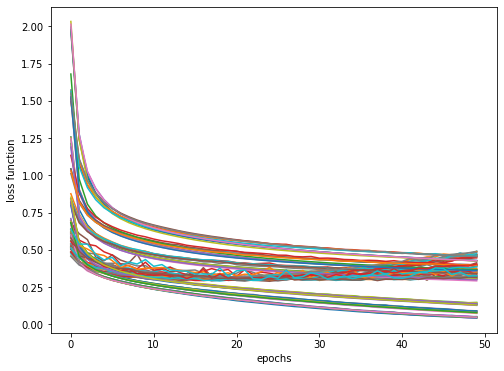

In [9]:
fig, ax = plt.subplots(figsize = (10,8))
count=1
for x in histories:
    # plot validation loss against train loss
    ax.plot(x.history["loss"], label = "training_loss"+str(count))
    ax.plot(x.history["val_loss"], label = "val_loss"+str(count))
    count+=1
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.show()

plot accuracy for all 45 curve 

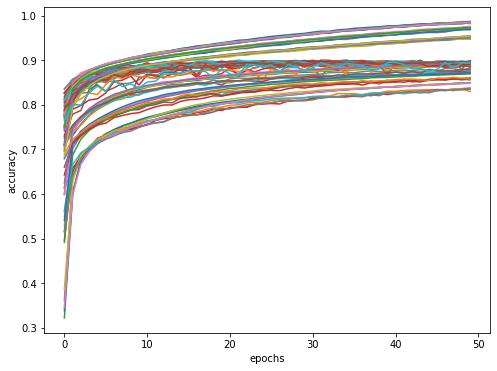

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
count=1
for x in histories:
    # plot validation accuracy against all accuracy
    ax.plot(x.history["accuracy"], label = "training_accuracy"+str(count))
    ax.plot(x.history["val_accuracy"], label = "val_accuracy"+str(count))
    count+=1
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

 Of course these two graphs are too chatoic, so I will narrow it down a bit

Each optimizer across batch sizes across folds; adam -> 3 plots; 1 with each batch size. each plot contain all 5 folds

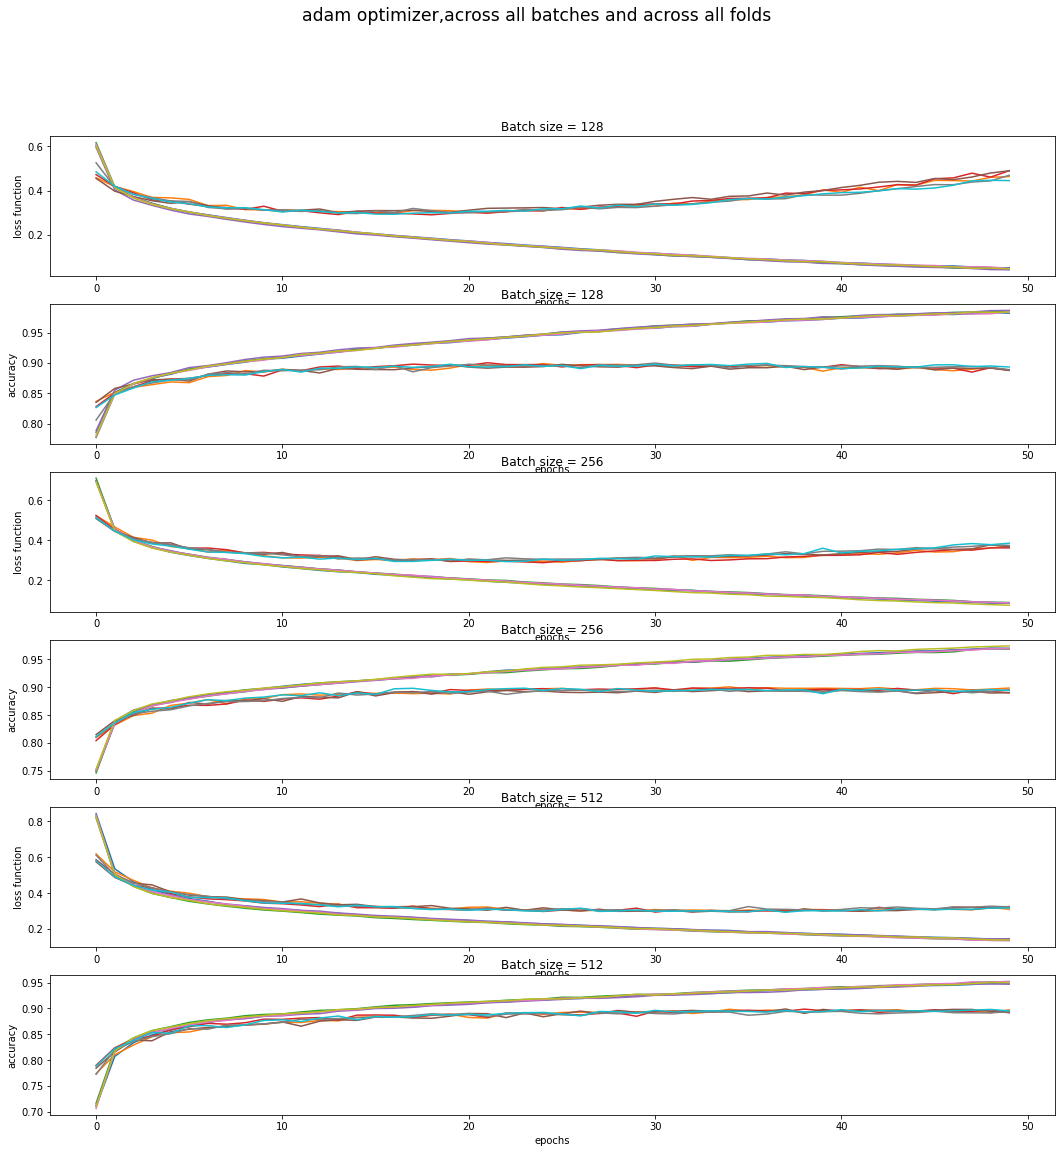

In [17]:

fig, ax = plt.subplots(6,figsize=(18,18))

batch_sizes = [128,256] #512
# looping over all adams models in the big histories list
for i in range(0,len(batch_sizes)):
    count_fold=1
    # fixing batch size and getting models that have both adam and same batch size
    for x in range(i*3,len(histories),9):
        # plot validation loss against train loss
        ax[i*2].plot(histories[x].history["loss"], label = "training_loss, fold:"+str(count_fold))
        ax[i*2].set(xlabel='epochs', ylabel='loss function',title="Batch size = "+str(batch_sizes[i]))
        ax[i*2].plot(histories[x].history["val_loss"], label = "val_loss, fold:"+str(count_fold))
        
        # plot validation accuracy against all accuracy
        ax[i*2+1].plot(histories[x].history["accuracy"], label = "training_accuracy, fold:"+str(count_fold))
        ax[i*2+1].set(xlabel='epochs', ylabel='accuracy',title="Batch size = "+str(batch_sizes[i]))
        ax[i*2+1].plot(histories[x].history["val_accuracy"], label = "val_accuracy, fold:"+str(count_fold))
        count_fold+=1
#     ax[i].legend(loc = 'upper center')
fig.suptitle("adam optimizer,across all batches and across all folds",fontsize='xx-large')
plt.show()

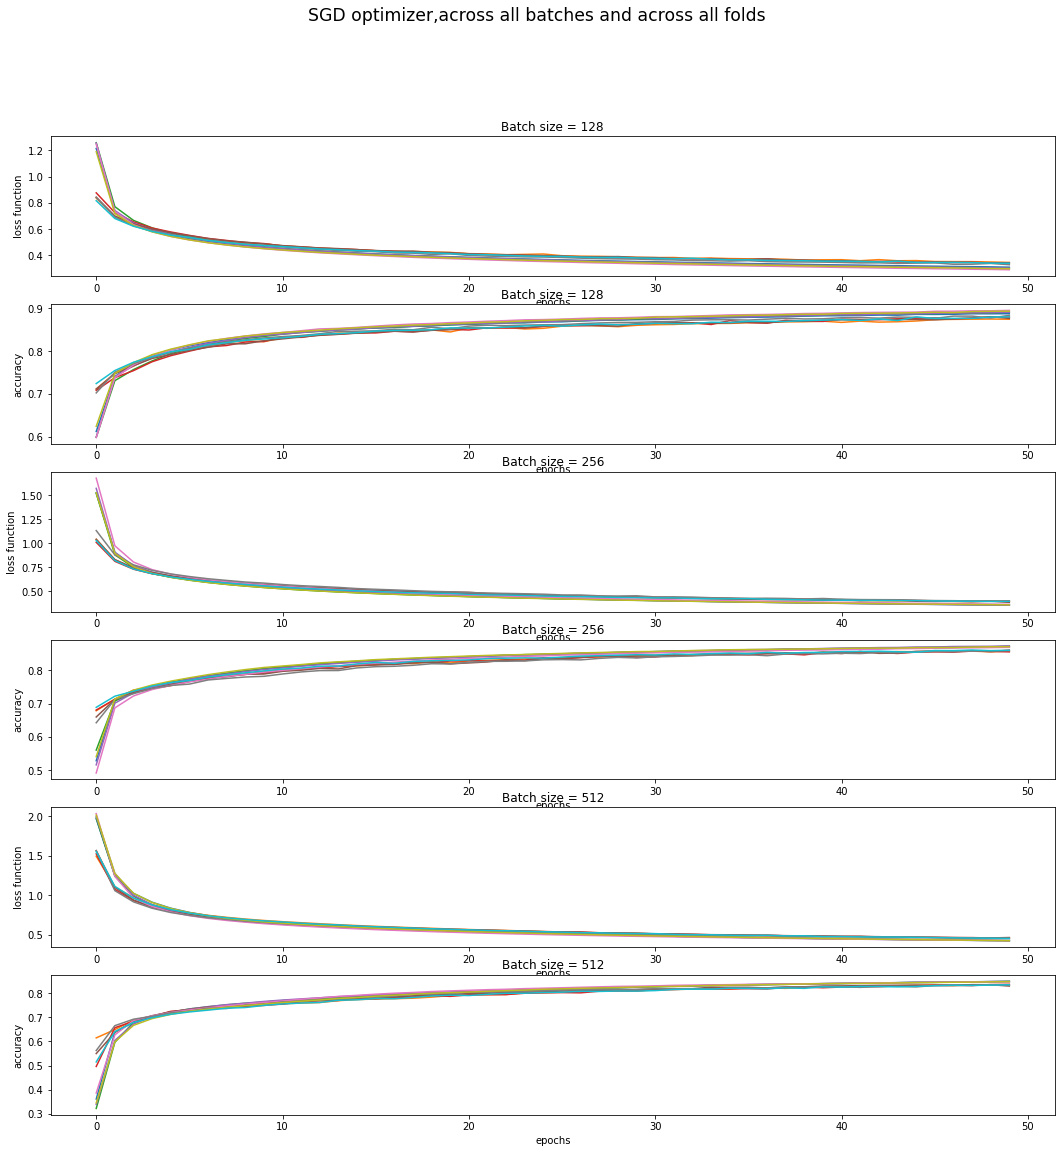

In [21]:

fig, ax = plt.subplots(6,figsize=(18,18))

batch_sizes = [128,256,512]
# looping over all SGD models in the big histories list
for i in range(0,len(batch_sizes)):
    count_fold=1
       # fixing batch size and getting models that have both SGD and same batch size
    for x in range((i*3)+1,len(histories),9):
        # plot validation loss against train loss
        ax[i*2].plot(histories[x].history["loss"], label = "training_loss, fold:"+str(count_fold))
        ax[i*2].set(xlabel='epochs', ylabel='loss function',title="Batch size = "+str(batch_sizes[i]))
        ax[i*2].plot(histories[x].history["val_loss"], label = "val_loss, fold:"+str(count_fold))
        
        # plot validation accuracy against all accuracy
        ax[i*2+1].plot(histories[x].history["accuracy"], label = "training_accuracy, fold:"+str(count_fold))
        ax[i*2+1].set(xlabel='epochs', ylabel='accuracy',title="Batch size = "+str(batch_sizes[i]))
        ax[i*2+1].plot(histories[x].history["val_accuracy"], label = "val_accuracy, fold:"+str(count_fold))
        count_fold+=1
#     ax[i].legend(loc = 'upper center')
fig.suptitle("SGD optimizer,across all batches and across all folds",fontsize='xx-large')
plt.show()

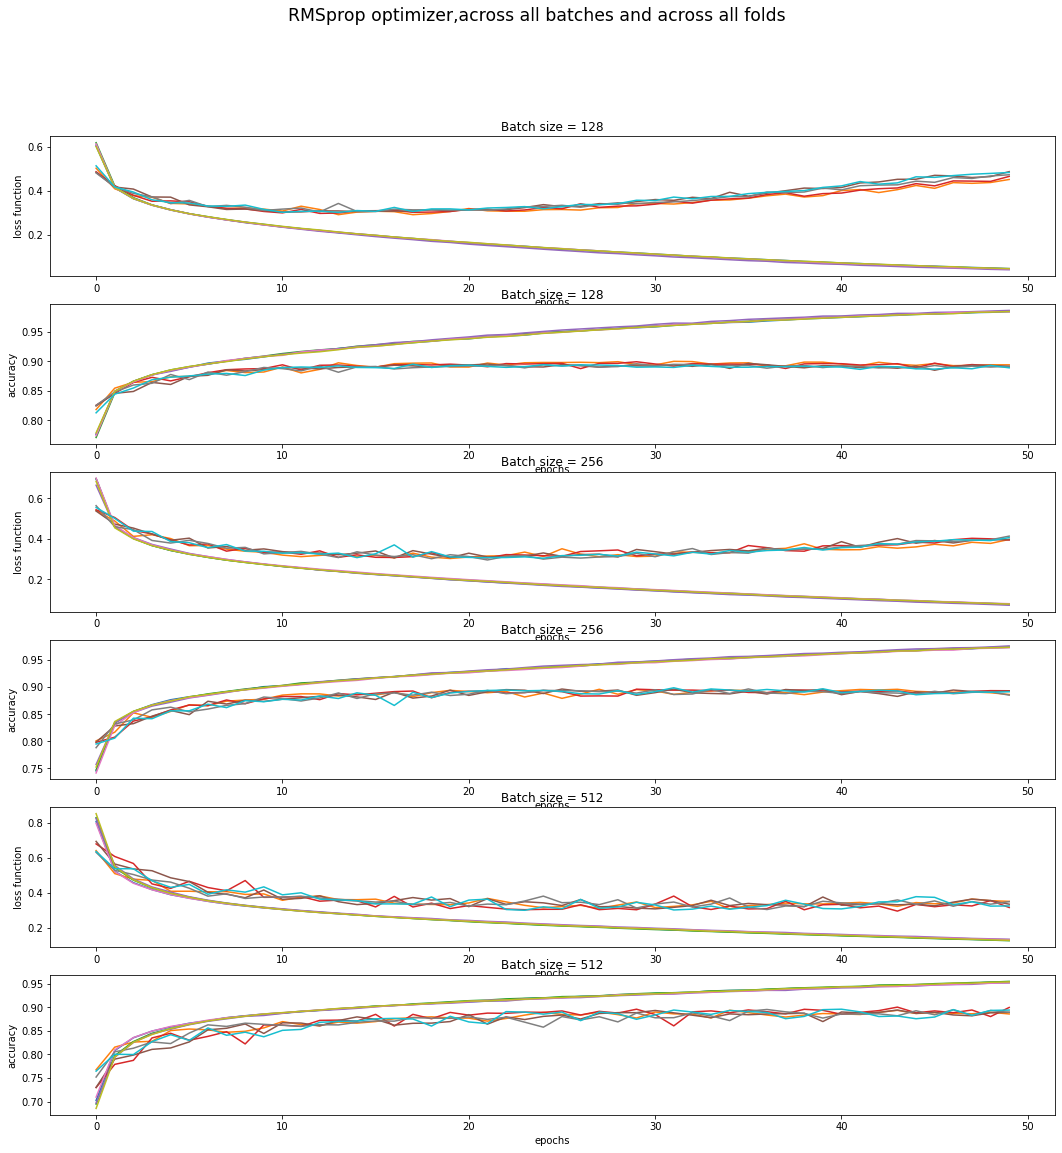

In [20]:

fig, ax = plt.subplots(6,figsize=(18,18))

batch_sizes = [128,256,512]
# looping over all RMSprop models in the big histories list
for i in range(0,len(batch_sizes)):
    count_fold=1
        # fixing batch size and getting models that have both RMSprop and same batch size
    for x in range((i*3)+2,len(histories),9):
        # plot validation loss against train loss
        ax[i*2].plot(histories[x].history["loss"], label = "training_loss, fold:"+str(count_fold))
        ax[i*2].set(xlabel='epochs', ylabel='loss function',title="Batch size = "+str(batch_sizes[i]))
        ax[i*2].plot(histories[x].history["val_loss"], label = "val_loss, fold:"+str(count_fold))
        
        # plot validation accuracy against all accuracy
        ax[i*2+1].plot(histories[x].history["accuracy"], label = "training_accuracy, fold:"+str(count_fold))
        ax[i*2+1].set(xlabel='epochs', ylabel='accuracy',title="Batch size = "+str(batch_sizes[i]))
        ax[i*2+1].plot(histories[x].history["val_accuracy"], label = "val_accuracy, fold:"+str(count_fold))
        count_fold+=1
#     ax[i].legend(loc = 'upper center')
fig.suptitle("RMSprop optimizer,across all batches and across all folds",fontsize='xx-large')
plt.show()

LeNet5 performance on Fashion MNIST ( the question that I can't answer )

Answer : 
The paper of Yifan Wang discusses the preformance of LeNet 5 on the fashion MNIST data set
https://iopscience.iop.org/article/10.1088/1755-1315/428/1/012097

LeNet is an old architecture presented back in 1989 

<a class="anchor" id="resnet"></a>
# Transfer Learning 

The accurices are bad because of the pre-processing of the data set; ResNet and VGG require RGB images but fashion mnist is grey scale. I tried to make it up by resizing the image to 240x240 and 128x128 but I ran out of memory.


### ResNet 50

In [8]:
from keras.applications import resnet

In [9]:
#loading data set
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

#encoding labels
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

# convert images into 3 channel images
x_train_3d=np.dstack([x_train] * 3)
x_test_3d=np.dstack([x_test]*3)

#reshaping images
x_train_3d = x_train_3d.reshape(-1, 28,28,3)
x_test_3d= x_test_3d.reshape (-1,28,28,3)

#resizing images to fit into keras
from keras.preprocessing.image import img_to_array, array_to_img
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train_3d])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test_3d])

# Normalise the data and change data type
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# preprocessing for the resnet
from tensorflow.keras.applications.resnet50 import preprocess_input
train_X = preprocess_input(train_X) 
test_X = preprocess_input(test_X)

In [10]:
#importing resnet
model = resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(48,48,3))
model.trainable = False

flatten = Flatten()
#my classification dense layer
new_layer2 = Dense(10, activation='softmax')


inp2 = model.input
# feeding the output of the vgg16 to my dense layer
out2 = new_layer2(flatten(model.output))

#define the transfer learning model
model2 = Model(inp2, out2)

In [11]:
#comile the model with the same settings as all of the other models
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_crossentropy'])

In [12]:
history = model2.fit(train_X,train_Y_one_hot,
                     validation_data=(test_X, test_Y_one_hot),
                     epochs=200,batch_size=128,
                     verbose=1,
                     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )])

Epoch 1/200
469/469 [==============================] - 22s 29ms/step - loss: 1.0831 - categorical_crossentropy: 1.0831 - val_loss: 0.8260 - val_categorical_crossentropy: 0.82608s - loss: 1.7512 - categorical_crossent - ETA: 2s - loss: 1.1612 -  - ETA: 1s - loss: 1.1259 - categorical_cr - ETA: 1s - loss: 1.109
Epoch 2/200
469/469 [==============================] - 12s 25ms/step - loss: 0.7712 - categorical_crossentropy: 0.7712 - val_loss: 0.7212 - val_categorical_crossentropy: 0.7212
Epoch 3/200
469/469 [==============================] - 12s 25ms/step - loss: 0.7020 - categorical_crossentropy: 0.7020 - val_loss: 0.7266 - val_categorical_crossentropy: 0.7266
Epoch 4/200
469/469 [==============================] - 11s 24ms/step - loss: 0.6598 - categorical_crossentropy: 0.6598 - val_loss: 0.6816 - val_categorical_crossentropy: 0.6816
Epoch 5/200
469/469 [==============================] - 11s 24ms/step - loss: 0.6372 - categorical_crossentropy: 0.6372 - val_loss: 0.6349 - val_categorical_cr

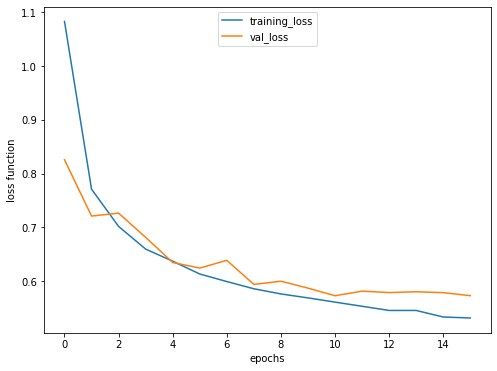

In [13]:
fig, ax = plt.subplots(figsize = (8,6))

ax.plot(history.history["loss"], label = "training_loss")
ax.plot(history.history["val_loss"], label = "val_loss")
ax.legend(loc = 'upper center')
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.show()

<a class="anchor" id="vgg"></a>
## VGG16 

In [2]:
from keras.applications import vgg16

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

In [4]:
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

In [5]:
# convert images into 3 channel images
x_train_3d=np.dstack([x_train] * 3)
x_test_3d=np.dstack([x_test]*3)

x_train_3d = x_train_3d.reshape(-1, 28,28,3)
x_test_3d= x_test_3d.reshape (-1,28,28,3)
x_train_3d.shape,x_test_3d.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [6]:
from keras.preprocessing.image import img_to_array, array_to_img
train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train_3d])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test_3d])
#train_x = preprocess_input(x)
train_X.shape, test_X.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [7]:
# Normalise the data and change data type
train_X = train_X / 255.
test_X = test_X / 255.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [8]:
from tensorflow.keras.applications.vgg16 import preprocess_input
train_X = preprocess_input(train_X) 
test_X = preprocess_input(test_X)

In [9]:
#getting the vgg16 model
model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(48,48,3))
model.trainable = False
flatten = Flatten()
#my classification dense layer
new_layer2 = Dense(10, activation='softmax')


inp2 = model.input
# feeding the output of the vgg16 to my dense layer
out2 = new_layer2(flatten(model.output))

#define the transfer learning model
model2 = Model(inp2, out2)

In [10]:
#comile the model with the same settings as all of the other models
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_crossentropy'])

In [11]:
history = model2.fit(train_X,train_Y_one_hot,
                     validation_data=(test_X, test_Y_one_hot),
                     epochs=200,batch_size=128,
                     verbose=1,
                     callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )])

Epoch 1/200
469/469 [==============================] - 13s 21ms/step - loss: 2.1052 - categorical_crossentropy: 2.1052 - val_loss: 1.7978 - val_categorical_crossentropy: 1.7978
Epoch 2/200
469/469 [==============================] - 9s 20ms/step - loss: 1.6900 - categorical_crossentropy: 1.6900 - val_loss: 1.6246 - val_categorical_crossentropy: 1.6246
Epoch 3/200
469/469 [==============================] - 9s 19ms/step - loss: 1.5508 - categorical_crossentropy: 1.5508 - val_loss: 1.5184 - val_categorical_crossentropy: 1.5184
Epoch 4/200
469/469 [==============================] - 9s 20ms/step - loss: 1.4524 - categorical_crossentropy: 1.4524 - val_loss: 1.4289 - val_categorical_crossentropy: 1.4289
Epoch 5/200
469/469 [==============================] - 9s 19ms/step - loss: 1.3787 - categorical_crossentropy: 1.3787 - val_loss: 1.3702 - val_categorical_crossentropy: 1.3702
Epoch 6/200
469/469 [==============================] - 9s 19ms/step - loss: 1.3203 - categorical_crossentropy: 1.3203 -

469/469 [==============================] - 9s 18ms/step - loss: 0.8493 - categorical_crossentropy: 0.8493 - val_loss: 0.8806 - val_categorical_crossentropy: 0.8806
Epoch 93/200
469/469 [==============================] - 9s 18ms/step - loss: 0.8476 - categorical_crossentropy: 0.8476 - val_loss: 0.8788 - val_categorical_crossentropy: 0.8788
Epoch 94/200
469/469 [==============================] - 9s 19ms/step - loss: 0.8463 - categorical_crossentropy: 0.8463 - val_loss: 0.8834 - val_categorical_crossentropy: 0.8834
Epoch 95/200
469/469 [==============================] - 9s 18ms/step - loss: 0.8459 - categorical_crossentropy: 0.8459 - val_loss: 0.8766 - val_categorical_crossentropy: 0.8766
Epoch 96/200
469/469 [==============================] - 9s 19ms/step - loss: 0.8450 - categorical_crossentropy: 0.8450 - val_loss: 0.8771 - val_categorical_crossentropy: 0.8771
Epoch 97/200
469/469 [==============================] - 9s 19ms/step - loss: 0.8444 - categorical_crossentropy: 0.8444 - val_los

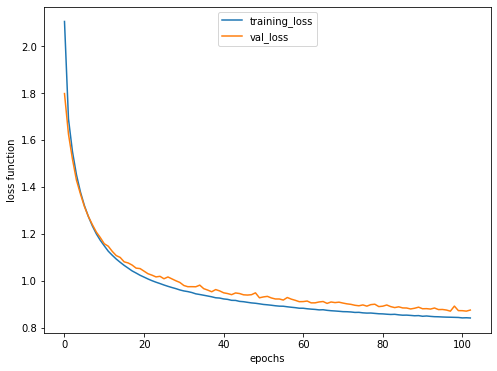

In [12]:
fig, ax = plt.subplots(figsize = (8,6))

ax.plot(history.history["loss"], label = "training_loss")
ax.plot(history.history["val_loss"], label = "val_loss")
ax.legend(loc = 'upper center')
plt.xlabel("epochs")
plt.ylabel("loss function")
plt.show()

<a class="anchor" id="ref"></a>
## refrences : 
- https://www.kaggle.com/code/guilhermesdas/fashion-mnist-vgg16/notebook
- https://www.kaggle.com/code/anandad/classify-fashion-mnist-with-vgg16/notebook
- https://www.reddit.com/r/tensorflow/comments/i4mx5v/classify_fashion_mnist_with_vgg16_question/
- https://datahacker.rs/lenet-5-implementation-tensorflow-2-0/
- https://github.com/python-engineer/tensorflow-course/blob/master/08_09_Star_Wars_Project.ipynb
- https://www.youtube.com/watch?v=8cN0PiZQl18&t=503s&ab_channel=PythonEngineer
- https://stackoverflow.com/questions/40119743/convert-a-grayscale-image-to-a-3-channel-image
- https://stackoverflow.com/questions/39463019/how-to-copy-numpy-array-value-into-higher-dimensions